<a href="https://colab.research.google.com/github/VictorTerres/calculosDadosRPG/blob/main/EspadaDupla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Valores em comum para todos os Testes

import random
import math

valor_ac = 15
modificador_atributo = 5
modificador_acerto_proficiencia = 2
vantagem_grito = 0
vantagem_vex = 0
rerolar_espada = 0

In [ ]:
## Ataque da Kópis com Espada Curta - Inimigo Único (Monstruosidade) - Estilo: Dual Wielder + Talento: Piercer
## Dois primeiros turnos atacar com espada curta + kópis e ativar habilidades bonus

# Criar vetores para armazenar as rolagens e os ataques
rolagens = []
ataques = []
vantagens = []

################################# Turno 01 - Marca do Caçador + Ataque Duplo
# Ataque Principal com Espada Curta para Ativar Nick
rolagem_1a = random.randint(1, 20)
vantagens.append(0)

if rolagem_1a == 20: #Caso o ataque seja um crítico!
  rolagem_1a += modificador_atributo
  rolagem_1a += modificador_acerto_proficiencia
  rolagens.append(rolagem_1a)

  # Modificação para o dano da Espada em caso de crítico
  rolagens_dano_espada = [random.randint(1, 6), random.randint(1, 6), random.randint(1, 6)]
  menor_valor = min(rolagens_dano_espada)

  if menor_valor < 4:
      indice_menor = rolagens_dano_espada.index(menor_valor)
      rolagens_dano_espada[indice_menor] = random.randint(1, 6) # Substitui pelo novo roll
      rerolar_espada = 0

  dano_espada_1a = sum(rolagens_dano_espada) # Soma os valores do vetor
  dano_marca_1a = random.randint(1, 6) + random.randint(1, 6)
  dano_final_1a = dano_espada_1a + dano_marca_1a + modificador_atributo

elif rolagem_1a + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
  rolagem_1a += modificador_atributo
  rolagem_1a += modificador_acerto_proficiencia
  rolagens.append(rolagem_1a)

  dano_espada_1a = random.randint(1, 6)
  if dano_espada_1a < 4:
      dano_espada_1a = random.randint(1, 6) # Substitui pelo novo roll
      rerolar_espada = 0
  dano_marca_1a = random.randint(1, 6)
  dano_final_1a = dano_espada_1a + dano_marca_1a + modificador_atributo

else: # Caso não acerte
  rolagem_1a += modificador_atributo
  rolagem_1a += modificador_acerto_proficiencia
  rolagens.append(rolagem_1a)
  dano_espada_1a = 0
  dano_marca_1a = 0
  dano_final_1a = 0

# Ataque Secundário
rolagem_1b = random.randint(1, 20)
vantagens.append(0)

if rolagem_1b == 20: #Caso o ataque seja um crítico!
  rolagem_1b += modificador_atributo
  rolagem_1b += modificador_acerto_proficiencia

  rolagens.append(rolagem_1b)

  # Modificação para o dano da Kópis em caso de crítico
  rolagens_dano_kopis = [random.randint(1, 8), random.randint(1, 8), random.randint(1, 8)]
  menor_valor = min(rolagens_dano_kopis)

  if menor_valor < 4 and rerolar_espada:
      indice_menor = rolagens_dano_kopis.index(menor_valor)
      rolagens_dano_kopis[indice_menor] = random.randint(1, 8) # Substitui pelo novo roll
      rerolar_espada = 0

  dano_kopis_1b = sum(rolagens_dano_kopis) # Soma os valores do vetor
  dano_marca_1b = random.randint(1, 6) + random.randint(1, 6)
  dano_final_1b = dano_kopis_1b + dano_marca_1b + modificador_atributo
  vantagem_vex = 1

elif rolagem_1b + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
  rolagem_1b += modificador_atributo
  rolagem_1b += modificador_acerto_proficiencia
  rolagens.append(rolagem_1a)

  dano_kopis_1b = random.randint(1, 8)
  if dano_kopis_1b < 4 and rerolar_espada:
      dano_kopis_1b = random.randint(1, 8) # Substitui pelo novo roll
      rerolar_espada = 0

  dano_marca_1b = random.randint(1, 6)
  dano_final_1b = dano_kopis_1b + dano_marca_1b + modificador_atributo
  vantagem_vex = 1

else: # Caso não acerte
  rolagem_1b += modificador_atributo
  rolagem_1b += modificador_acerto_proficiencia
  rolagens.append(rolagem_1b)
  dano_kopis_1b = 0
  dano_marca_1b = 0
  dano_final_1b = 0
  vantagem_vex = 0

#Soma dos dois ataques para cálculo de média de dano por Rodada
dano_final_1 = dano_final_1a + dano_final_1b
ataques.append(dano_final_1)

################################## Turno 02 - Grito de Guerra + Ataque Principal
# Ataque Principal
vantagem_grito = 1

# Ataque Principal com Espada Curta para Ativar Nick
if vantagem_grito or vantagem_vex:
  rolagem_2a = max(random.randint(1, 20), random.randint(1, 20))
  vantagens.append(1)
else:
  rolagem_2a = random.randint(1, 20)
  vantagens.append(0)

if rolagem_2a == 20: #Caso o ataque seja um crítico!
  rolagem_2a += modificador_atributo
  rolagem_2a += modificador_acerto_proficiencia

  rolagens.append(rolagem_2a)

  # Modificação para o dano da Espada em caso de crítico
  rolagens_dano_espada = [random.randint(1, 6), random.randint(1, 6), random.randint(1, 6)]
  menor_valor = min(rolagens_dano_espada)

  if menor_valor < 4:
      indice_menor = rolagens_dano_espada.index(menor_valor)
      rolagens_dano_espada[indice_menor] = random.randint(1, 6) # Substitui pelo novo roll
      rerolar_espada = 0

  dano_espada_2a = sum(rolagens_dano_espada) # Soma os valores do vetor
  dano_marca_2a = random.randint(1, 6) + random.randint(1, 6)
  dano_final_2a = dano_espada_2a + dano_marca_2a + modificador_atributo

elif rolagem_2a + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
  rolagem_2a += modificador_atributo
  rolagem_2a += modificador_acerto_proficiencia
  rolagens.append(rolagem_2a)

  dano_espada_2a = random.randint(1, 6)
  if dano_espada_2a < 4:
      dano_espada_2a = random.randint(1, 6) # Substitui pelo novo roll
      rerolar_espada = 0
  dano_marca_2a = random.randint(1, 6)
  dano_final_2a = dano_espada_2a + dano_marca_1a + modificador_atributo

else: # Caso não acerte
  rolagem_2a += modificador_atributo
  rolagem_2a += modificador_acerto_proficiencia
  rolagens.append(rolagem_2a)
  dano_espada_2a = 0
  dano_marca_2a = 0
  dano_final_2a = 0

# Ataque Secundário
if vantagem_grito or vantagem_vex:
  rolagem_2b = max(random.randint(1, 20), random.randint(1, 20))
  vantagens.append(1)
else:
  rolagem_2b = random.randint(1, 20)
  vantagens.append(0)

if rolagem_2b == 20: #Caso o ataque seja um crítico!
  rolagem_2b += modificador_atributo
  rolagem_2b += modificador_acerto_proficiencia
  rolagens.append(rolagem_2b)

  # Modificação para o dano da Kópis em caso de crítico
  rolagens_dano_kopis = [random.randint(1, 8), random.randint(1, 8), random.randint(1, 8)]
  menor_valor = min(rolagens_dano_kopis)

  if menor_valor < 4 and rerolar_espada:
      indice_menor = rolagens_dano_kopis.index(menor_valor)
      rolagens_dano_kopis[indice_menor] = random.randint(1, 8) # Substitui pelo novo roll

  dano_kopis_2b = sum(rolagens_dano_kopis) # Soma os valores do vetor
  dano_marca_2b = random.randint(1, 6) + random.randint(1, 6)
  dano_final_2b = dano_kopis_2b + dano_marca_2b + modificador_atributo
  vantagem_vex = 1

elif rolagem_2b + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
  rolagem_2b += modificador_atributo
  rolagem_2b += modificador_acerto_proficiencia
  rolagens.append(rolagem_2b)

  dano_kopis_2b = random.randint(1, 8)
  if dano_kopis_2b < 4 and rerolar_espada:
      dano_kopis_2b = random.randint(1, 8) # Substitui pelo novo roll
  dano_marca_2b = random.randint(1, 6)
  dano_final_2b = dano_kopis_2b + dano_marca_2b + modificador_atributo
  vantagem_vex = 1

else: # Caso não acerte
  rolagem_2b += modificador_atributo
  rolagem_2b += modificador_acerto_proficiencia
  rolagens.append(rolagem_2b)
  dano_kopis_2b = 0
  dano_marca_2b = 0
  dano_final_2b = 0
  ataques.append(dano_final_2b)
  vantagem_vex = 0

#Soma dos dois ataques para cálculo de média de dano por Rodada
dano_final_2 = dano_final_2a + dano_final_2b
ataques.append(dano_final_2)

levou_dano = random.randint(1, 100)

if levou_dano <= 25:
  vantagem_grito = 0

################################# Turno 03 ao 10 - Ataque Principal e Secundário
for i in range(3, 11): # Loop para os Ataques
    # Ataque Principal
    if vantagem_grito or vantagem_vex:
      rolagem_pa = max(random.randint(1, 20), random.randint(1, 20))
      vantagens.append(1)
    else:
      rolagem_pa = random.randint(1, 20)
      vantagens.append(0)

    if rolagem_pa == 20: #Caso o ataque principal seja um crítico!
      rolagem_pa += modificador_atributo
      rolagem_pa += modificador_acerto_proficiencia

      rolagens.append(rolagem_pa)

      # Modificação para o dano da Kópis em caso de crítico
      rolagens_dano_kopis = [random.randint(1, 8), random.randint(1, 8), random.randint(1, 8)]
      menor_valor = min(rolagens_dano_kopis)

      if menor_valor < 4:
          indice_menor = rolagens_dano_kopis.index(menor_valor)
          rolagens_dano_kopis[indice_menor] = random.randint(1, 8) # Substitui pelo novo roll
          rerolar_espada = 0

      dano_kopis = sum(rolagens_dano_kopis) # Soma os valores do vetor
      dano_marca_kopis = (random.randint(1, 6) + random.randint(1, 6))
      dano_final_pa = dano_kopis + dano_marca_kopis + modificador_atributo
      vantagem_vex = 1
    elif rolagem_pa + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
      rolagem_pa += modificador_atributo
      rolagem_pa += modificador_acerto_proficiencia
      rolagens.append(rolagem_pa)

      dano_kopis = random.randint(1, 8)
      if dano_kopis < 4:
          dano_kopis = random.randint(1, 8) # Substitui pelo novo roll
          rerolar_espada = 0
      dano_marca_kopis = random.randint(1, 6)
      dano_final_pa = dano_kopis + dano_marca_kopis + modificador_atributo
      vantagem_vex = 1
    else: # Caso não acerte
      rolagem_pa += modificador_atributo
      rolagem_pa += modificador_acerto_proficiencia
      rolagens.append(rolagem_pa)
      dano_kopis = 0
      dano_marca_kopis = 0
      dano_final_pa = 0
      vantagem_vex = 0

    # Ataque Secundário
    if vantagem_grito or vantagem_vex:
      rolagem_sa = max(random.randint(1, 20), random.randint(1, 20))
      vantagens.append(1)
    else:
      rolagem_sa = random.randint(1, 20)
      vantagens.append(0)

    if rolagem_sa == 20: #Caso o ataque secundário seja um crítico!
        rolagem_sa += modificador_atributo
        rolagem_sa += modificador_acerto_proficiencia

        rolagens.append(rolagem_sa)

        # Modificação para o dano da Espada em caso de crítico
        rolagens_dano_espada = [random.randint(1, 6), random.randint(1, 6), random.randint(1, 6)] # d6 para espada
        menor_valor_espada = min(rolagens_dano_espada)

        if menor_valor_espada < 4 and rerolar_espada:
            indice_menor_espada = rolagens_dano_espada.index(menor_valor_espada)
            rolagens_dano_espada[indice_menor_espada] = random.randint(1, 6) # Substitui pelo novo roll (d6)

        dano_espada = sum(rolagens_dano_espada) # Soma os valores do vetor
        dano_marca_espada = random.randint(1, 6) + random.randint(1, 6)
        dano_final_sa = dano_espada + dano_marca_espada + modificador_atributo
    elif rolagem_sa + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
        rolagem_sa += modificador_atributo
        rolagem_sa += modificador_acerto_proficiencia
        rolagens.append(rolagem_sa)

        dano_espada = random.randint(1, 6)
        if dano_espada < 4 and rerolar_espada:
            dano_espada = random.randint(1, 6) # Substitui pelo novo roll (d6)
        dano_marca_espada = random.randint(1, 6)
        dano_final_sa = dano_espada + dano_marca_espada + modificador_atributo
    else: # Caso não acerte
        rolagem_sa += modificador_atributo
        rolagem_sa += modificador_acerto_proficiencia
        rolagens.append(rolagem_sa)
        dano_espada = 0
        dano_marca_espada = 0
        dano_final_sa = 0

    #Soma dos dois ataques para cálculo de média de dano por Rodada
    dano_final = dano_final_pa + dano_final_sa
    ataques.append(dano_final)

    #Reset dos danos para não cumular
    dano_kopis = 0
    dano_espada = 0
    dano_marca_kopis = 0
    dano_marca_espada = 0
    dano_final_pa = 0
    dano_final_sa = 0
    dano_final = 0
    vantagem_vex = 0
    levou_dano = random.randint(1, 100)
    if levou_dano <= 25:
      vantagem_grito = 0

################################################################################
# Calcular a média dos resultados
media_rolagens = sum(rolagens) / len(rolagens)
media_dano = sum(ataques) / len(ataques)

# Formatar os vetores para exibição com 2 dígitos
rolagens_formatadas = [f"{rolagem:02d}" for rolagem in rolagens]
ataques_formatados = [f"{ataque:02d}" for ataque in ataques]

# Exibir a média dos resultados e os vetores formatados
print(f"A média das rolagens é: {media_rolagens}")
print(rolagens_formatadas)
print(f"A média dos danos: {media_dano}")
print(ataques_formatados)

A média das rolagens é: 19.4
['19', '19', '19', '20', '27', '27', '16', '14', '23', '11', '13', '12', '24', '24', '27', '24', '22', '27', '12', '08']
A média dos danos: 22.1
['22', '19', '48', '16', '15', '00', '26', '40', '35', '00']


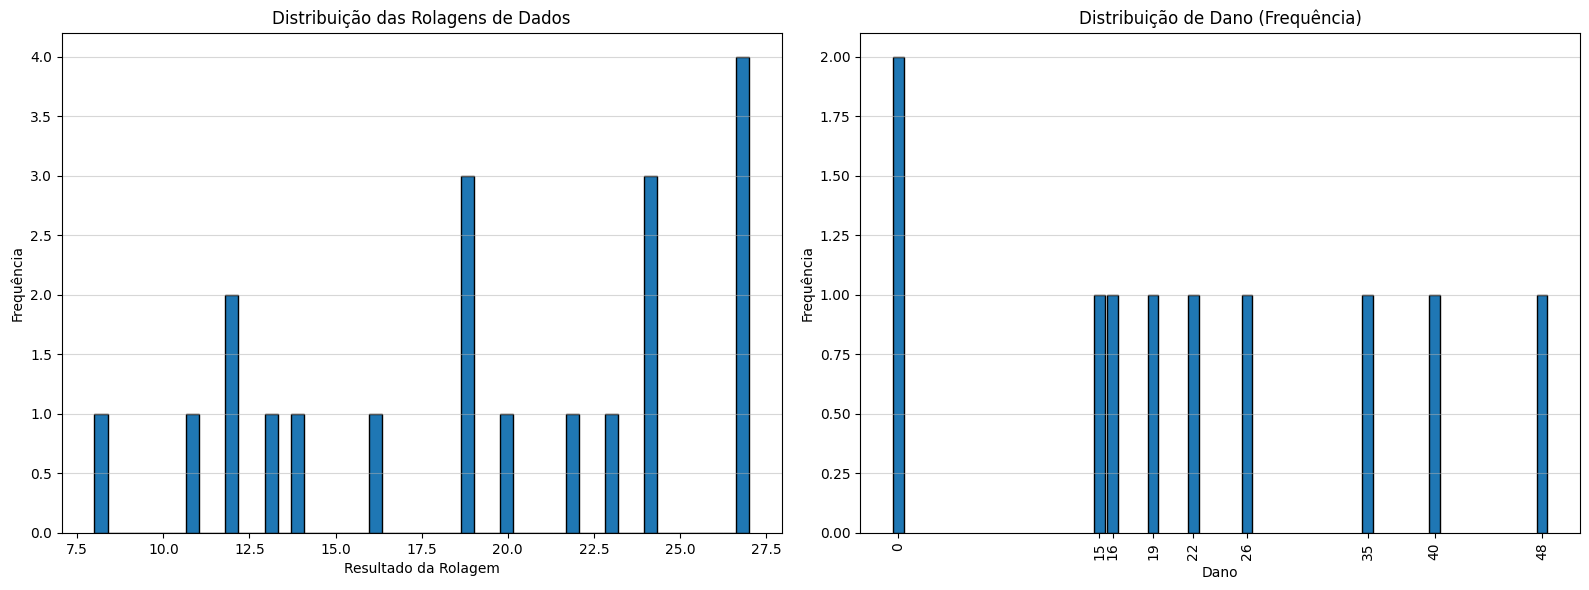

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

plt.figure(figsize=(16, 6)) # Aumenta o tamanho da figura para acomodar dois gráficos

# Gráfico 1: Distribuição das Rolagens de Dados
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, primeiro gráfico
plt.hist(rolagens, bins=50, edgecolor='black') # Cria o histograma com 50 barras
plt.title('Distribuição das Rolagens de Dados') # Adiciona um título
plt.xlabel('Resultado da Rolagem') # Adiciona um rótulo para o eixo x
plt.ylabel('Frequência') # Adiciona um rótulo para o eixo y
plt.grid(axis='y', alpha=0.5) # Adiciona uma grade no eixo y

# Gráfico 2: Distribuição de Dano em Frequência
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, segundo gráfico

# Contar a frequência de cada valor de dano
contagem_dano = Counter(ataques)
valores_dano = sorted(contagem_dano.keys())
frequencias_dano = [contagem_dano[valor] for valor in valores_dano]

# Criar o gráfico de barras para a distribuição de dano
plt.bar(valores_dano, frequencias_dano, edgecolor='black') # Usando frequências no eixo Y
plt.title('Distribuição de Dano (Frequência)') # Adiciona um título
plt.xlabel('Dano') # Adiciona um rótulo para o eixo x
plt.ylabel('Frequência') # Adiciona um rótulo para o eixo y
plt.grid(axis='y', alpha=0.5) # Adiciona uma grade no eixo y

# Definir os ticks do eixo x para os valores de dano (inteiros)
plt.xticks(valores_dano, rotation=90) # Rotate x-axis labels by 90 degrees

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show() # Exibe os gráficos

In [ ]:
import random
import math

# Initialize lists to store the averages from each run
all_avg_rolagens = []
all_avg_dano = []
all_advantage_attacks = [] # List to store whether an attack had advantage

# Run the simulation 100 times
for _ in range(100000):
    ## Ataque da Kópis com Espada Curta - Inimigo Único (Monstruosidade) - Estilo: Dual Wielder + Talento: Piercer
    ## Dois primeiros turnos atacar com espada curta + kópis e ativar habilidades bonus

    # Criar vetores para armazenar as rolagens e os ataques
    rolagens = []
    ataques = []
    vantagens = []

    ################################# Turno 01 - Marca do Caçador + Ataque Duplo
    # Ataque Principal com Espada Curta para Ativar Nick
    rolagem_1a = random.randint(1, 20)
    vantagens.append(0)

    if rolagem_1a == 20: #Caso o ataque seja um crítico!
      rolagem_1a += modificador_atributo
      rolagem_1a += modificador_acerto_proficiencia
      rolagens.append(rolagem_1a)

      # Modificação para o dano da Espada em caso de crítico
      rolagens_dano_espada = [random.randint(1, 6), random.randint(1, 6), random.randint(1, 6)]
      menor_valor = min(rolagens_dano_espada)

      if menor_valor < 4:
          indice_menor = rolagens_dano_espada.index(menor_valor)
          rolagens_dano_espada[indice_menor] = random.randint(1, 6) # Substitui pelo novo roll
          rerolar_espada = 0

      dano_espada_1a = sum(rolagens_dano_espada) # Soma os valores do vetor
      dano_marca_1a = random.randint(1, 6) + random.randint(1, 6)
      dano_final_1a = dano_espada_1a + dano_marca_1a + modificador_atributo

    elif rolagem_1a + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
      rolagem_1a += modificador_atributo
      rolagem_1a += modificador_acerto_proficiencia
      rolagens.append(rolagem_1a)

      dano_espada_1a = random.randint(1, 6)
      if dano_espada_1a < 4:
          dano_espada_1a = random.randint(1, 6) # Substitui pelo novo roll
          rerolar_espada = 0
      dano_marca_1a = random.randint(1, 6)
      dano_final_1a = dano_espada_1a + dano_marca_1a + modificador_atributo

    else: # Caso não acerte
      rolagem_1a += modificador_atributo
      rolagem_1a += modificador_acerto_proficiencia
      rolagens.append(rolagem_1a)
      dano_espada_1a = 0
      dano_marca_1a = 0
      dano_final_1a = 0

    # Ataque Secundário
    rolagem_1b = random.randint(1, 20)
    vantagens.append(0)

    if rolagem_1b == 20: #Caso o ataque seja um crítico!
      rolagem_1b += modificador_atributo
      rolagem_1b += modificador_acerto_proficiencia

      rolagens.append(rolagem_1b)

      # Modificação para o dano da Kópis em caso de crítico
      rolagens_dano_kopis = [random.randint(1, 8), random.randint(1, 8), random.randint(1, 8)]
      menor_valor = min(rolagens_dano_kopis)

      if menor_valor < 4 and rerolar_espada:
          indice_menor = rolagens_dano_kopis.index(menor_valor)
          rolagens_dano_kopis[indice_menor] = random.randint(1, 8) # Substitui pelo novo roll
          rerolar_espada = 0

      dano_kopis_1b = sum(rolagens_dano_kopis) # Soma os valores do vetor
      dano_marca_1b = random.randint(1, 6) + random.randint(1, 6)
      dano_final_1b = dano_kopis_1b + dano_marca_1b + modificador_atributo
      vantagem_vex = 1

    elif rolagem_1b + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
      rolagem_1b += modificador_atributo
      rolagem_1b += modificador_acerto_proficiencia
      rolagens.append(rolagem_1a)

      dano_kopis_1b = random.randint(1, 8)
      if dano_kopis_1b < 4 and rerolar_espada:
          dano_kopis_1b = random.randint(1, 8) # Substitui pelo novo roll
          rerolar_espada = 0

      dano_marca_1b = random.randint(1, 6)
      dano_final_1b = dano_kopis_1b + dano_marca_1b + modificador_atributo
      vantagem_vex = 1

    else: # Caso não acerte
      rolagem_1b += modificador_atributo
      rolagem_1b += modificador_acerto_proficiencia
      rolagens.append(rolagem_1b)
      dano_kopis_1b = 0
      dano_marca_1b = 0
      dano_final_1b = 0
      vantagem_vex = 0

    #Soma dos dois ataques para cálculo de média de dano por Rodada
    dano_final_1 = dano_final_1a + dano_final_1b
    ataques.append(dano_final_1)

    ################################## Turno 02 - Grito de Guerra + Ataque Principal
    # Ataque Principal
    vantagem_grito = 1

    # Ataque Principal com Espada Curta para Ativar Nick
    if vantagem_grito or vantagem_vex:
      rolagem_2a = max(random.randint(1, 20), random.randint(1, 20))
      vantagens.append(1)
    else:
      rolagem_2a = random.randint(1, 20)
      vantagens.append(0)

    if rolagem_2a == 20: #Caso o ataque seja um crítico!
      rolagem_2a += modificador_atributo
      rolagem_2a += modificador_acerto_proficiencia

      rolagens.append(rolagem_2a)

      # Modificação para o dano da Espada em caso de crítico
      rolagens_dano_espada = [random.randint(1, 6), random.randint(1, 6), random.randint(1, 6)]
      menor_valor = min(rolagens_dano_espada)

      if menor_valor < 4:
          indice_menor = rolagens_dano_espada.index(menor_valor)
          rolagens_dano_espada[indice_menor] = random.randint(1, 6) # Substitui pelo novo roll
          rerolar_espada = 0

      dano_espada_2a = sum(rolagens_dano_espada) # Soma os valores do vetor
      dano_marca_2a = random.randint(1, 6) + random.randint(1, 6)
      dano_final_2a = dano_espada_2a + dano_marca_2a + modificador_atributo

    elif rolagem_2a + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
      rolagem_2a += modificador_atributo
      rolagem_2a += modificador_acerto_proficiencia
      rolagens.append(rolagem_2a)

      dano_espada_2a = random.randint(1, 6)
      if dano_espada_2a < 4:
          dano_espada_2a = random.randint(1, 6) # Substitui pelo novo roll
          rerolar_espada = 0
      dano_marca_2a = random.randint(1, 6)
      dano_final_2a = dano_espada_2a + dano_marca_1a + modificador_atributo

    else: # Caso não acerte
      rolagem_2a += modificador_atributo
      rolagem_2a += modificador_acerto_proficiencia
      rolagens.append(rolagem_2a)
      dano_espada_2a = 0
      dano_marca_2a = 0
      dano_final_2a = 0

    # Ataque Secundário
    if vantagem_grito or vantagem_vex:
      rolagem_2b = max(random.randint(1, 20), random.randint(1, 20))
      vantagens.append(1)
    else:
      rolagem_2b = random.randint(1, 20)
      vantagens.append(0)

    if rolagem_2b == 20: #Caso o ataque seja um crítico!
      rolagem_2b += modificador_atributo
      rolagem_2b += modificador_acerto_proficiencia
      rolagens.append(rolagem_2b)

      # Modificação para o dano da Kópis em caso de crítico
      rolagens_dano_kopis = [random.randint(1, 8), random.randint(1, 8), random.randint(1, 8)]
      menor_valor = min(rolagens_dano_kopis)

      if menor_valor < 4 and rerolar_espada:
          indice_menor = rolagens_dano_kopis.index(menor_valor)
          rolagens_dano_kopis[indice_menor] = random.randint(1, 8) # Substitui pelo novo roll

      dano_kopis_2b = sum(rolagens_dano_kopis) # Soma os valores do vetor
      dano_marca_2b = random.randint(1, 6) + random.randint(1, 6)
      dano_final_2b = dano_kopis_2b + dano_marca_2b + modificador_atributo
      vantagem_vex = 1

    elif rolagem_2b + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
      rolagem_2b += modificador_atributo
      rolagem_2b += modificador_acerto_proficiencia
      rolagens.append(rolagem_2b)

      dano_kopis_2b = random.randint(1, 8)
      if dano_kopis_2b < 4 and rerolar_espada:
          dano_kopis_2b = random.randint(1, 8) # Substitui pelo novo roll
      dano_marca_2b = random.randint(1, 6)
      dano_final_2b = dano_kopis_2b + dano_marca_2b + modificador_atributo
      vantagem_vex = 1

    else: # Caso não acerte
      rolagem_2b += modificador_atributo
      rolagem_2b += modificador_acerto_proficiencia
      rolagens.append(rolagem_2b)
      dano_kopis_2b = 0
      dano_marca_2b = 0
      dano_final_2b = 0
      ataques.append(dano_final_2b)
      vantagem_vex = 0

    #Soma dos dois ataques para cálculo de média de dano por Rodada
    dano_final_2 = dano_final_2a + dano_final_2b
    ataques.append(dano_final_2)

    levou_dano = random.randint(1, 100)

    if levou_dano <= 25:
      vantagem_grito = 0

    ################################# Turno 03 ao 10 - Ataque Principal e Secundário
    for i in range(3, 11): # Loop para os Ataques
        # Ataque Principal
        if vantagem_grito or vantagem_vex:
          rolagem_pa = max(random.randint(1, 20), random.randint(1, 20))
          vantagens.append(1)
        else:
          rolagem_pa = random.randint(1, 20)
          vantagens.append(0)

        if rolagem_pa == 20: #Caso o ataque principal seja um crítico!
          rolagem_pa += modificador_atributo
          rolagem_pa += modificador_acerto_proficiencia

          rolagens.append(rolagem_pa)

          # Modificação para o dano da Kópis em caso de crítico
          rolagens_dano_kopis = [random.randint(1, 8), random.randint(1, 8), random.randint(1, 8)]
          menor_valor = min(rolagens_dano_kopis)

          if menor_valor < 4:
              indice_menor = rolagens_dano_kopis.index(menor_valor)
              rolagens_dano_kopis[indice_menor] = random.randint(1, 8) # Substitui pelo novo roll
              rerolar_espada = 0

          dano_kopis = sum(rolagens_dano_kopis) # Soma os valores do vetor
          dano_marca_kopis = (random.randint(1, 6) + random.randint(1, 6))
          dano_final_pa = dano_kopis + dano_marca_kopis + modificador_atributo
          vantagem_vex = 1
        elif rolagem_pa + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
          rolagem_pa += modificador_atributo
          rolagem_pa += modificador_acerto_proficiencia
          rolagens.append(rolagem_pa)

          dano_kopis = random.randint(1, 8)
          if dano_kopis < 4:
              dano_kopis = random.randint(1, 8) # Substitui pelo novo roll
              rerolar_espada = 0
          dano_marca_kopis = random.randint(1, 6)
          dano_final_pa = dano_kopis + dano_marca_kopis + modificador_atributo
          vantagem_vex = 1
        else: # Caso não acerte
          rolagem_pa += modificador_atributo
          rolagem_pa += modificador_acerto_proficiencia
          rolagens.append(rolagem_pa)
          dano_kopis = 0
          dano_marca_kopis = 0
          dano_final_pa = 0
          vantagem_vex = 0

        # Ataque Secundário
        if vantagem_grito or vantagem_vex:
          rolagem_sa = max(random.randint(1, 20), random.randint(1, 20))
          vantagens.append(1)
        else:
          rolagem_sa = random.randint(1, 20)
          vantagens.append(0)

        if rolagem_sa == 20: #Caso o ataque secundário seja um crítico!
            rolagem_sa += modificador_atributo
            rolagem_sa += modificador_acerto_proficiencia

            rolagens.append(rolagem_sa)

            # Modificação para o dano da Espada em caso de crítico
            rolagens_dano_espada = [random.randint(1, 6), random.randint(1, 6), random.randint(1, 6)] # d6 para espada
            menor_valor_espada = min(rolagens_dano_espada)

            if menor_valor_espada < 4 and rerolar_espada:
                indice_menor_espada = rolagens_dano_espada.index(menor_valor_espada)
                rolagens_dano_espada[indice_menor_espada] = random.randint(1, 6) # Substitui pelo novo roll (d6)

            dano_espada = sum(rolagens_dano_espada) # Soma os valores do vetor
            dano_marca_espada = random.randint(1, 6) + random.randint(1, 6)
            dano_final_sa = dano_espada + dano_marca_espada + modificador_atributo
        elif rolagem_sa + modificador_atributo + modificador_acerto_proficiencia >= valor_ac: # Caso acerte (não crítico)
            rolagem_sa += modificador_atributo
            rolagem_sa += modificador_acerto_proficiencia
            rolagens.append(rolagem_sa)

            dano_espada = random.randint(1, 6)
            if dano_espada < 4 and rerolar_espada:
                dano_espada = random.randint(1, 6) # Substitui pelo novo roll (d6)
            dano_marca_espada = random.randint(1, 6)
            dano_final_sa = dano_espada + dano_marca_espada + modificador_atributo
        else: # Caso não acerte
            rolagem_sa += modificador_atributo
            rolagem_sa += modificador_acerto_proficiencia
            rolagens.append(rolagem_sa)
            dano_espada = 0
            dano_marca_espada = 0
            dano_final_sa = 0

        #Soma dos dois ataques para cálculo de média de dano por Rodada
        dano_final = dano_final_pa + dano_final_sa
        ataques.append(dano_final)

        #Reset dos danos para não cumular
        dano_kopis = 0
        dano_espada = 0
        dano_marca_kopis = 0
        dano_marca_espada = 0
        dano_final_pa = 0
        dano_final_sa = 0
        dano_final = 0
        vantagem_vex = 0
        levou_dano = random.randint(1, 100)
        if levou_dano <= 25:
          vantagem_grito = 0

################################################################################
    # Calcular a média dos resultados
    media_rolagens = sum(rolagens) / len(rolagens)
    media_dano = sum(ataques) / len(ataques)


    # Calculate and store the averages for this run
    if len(rolagens) > 0:
        media_rolagens = sum(rolagens) / len(rolagens)
        all_avg_rolagens.append(media_rolagens)

    if len(ataques) > 0:
        media_dano = sum(ataques) / len(ataques)
        all_avg_dano.append(media_dano)

    # Store the advantage status for this run
    all_advantage_attacks.extend(vantagens)


# Calculate the overall average of the averages
overall_avg_rolagens = sum(all_avg_rolagens) / len(all_avg_rolagens) if len(all_avg_rolagens) > 0 else 0
overall_avg_dano = sum(all_avg_dano) / len(all_avg_dano) if len(all_avg_dano) > 0 else 0

# Calculate the percentage of attacks made with advantage
percentage_advantage = (sum(all_advantage_attacks) / len(all_advantage_attacks)) * 100 if len(all_advantage_attacks) > 0 else 0


print(f"Média geral das rolagens (ao longo de 100000 simulações): {overall_avg_rolagens}")
print(f"Média geral dos danos (ao longo de 100000 simulações): {overall_avg_dano}")
print(f"Porcentagem de ataques feitos com vantagem: {percentage_advantage:.2f}%")

Média geral das rolagens (ao longo de 100000 simulações): 19.253572000000183
Média geral dos danos (ao longo de 100000 simulações): 21.530738181818045
Porcentagem de ataques feitos com vantagem: 55.46%


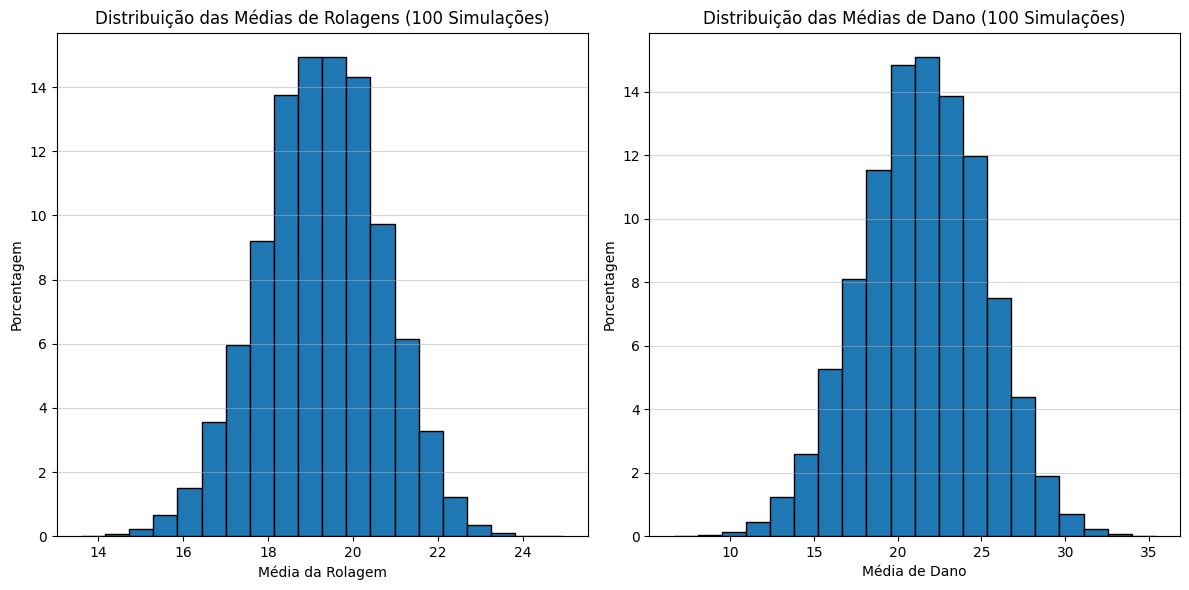

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Plot histogram for average rolagens with percentages
plt.subplot(1, 2, 1)
weights_rolagens = np.ones_like(all_avg_rolagens) / len(all_avg_rolagens)
plt.hist(all_avg_rolagens, bins=20, edgecolor='black', weights=weights_rolagens * 100)
plt.title('Distribuição das Médias de Rolagens (100 Simulações)')
plt.xlabel('Média da Rolagem')
plt.ylabel('Porcentagem')
plt.grid(axis='y', alpha=0.5)

# Plot histogram for average dano with percentages
plt.subplot(1, 2, 2)
weights_dano = np.ones_like(all_avg_dano) / len(all_avg_dano)
plt.hist(all_avg_dano, bins=20, edgecolor='black', weights=weights_dano * 100)
plt.title('Distribuição das Médias de Dano (100 Simulações)')
plt.xlabel('Média de Dano')
plt.ylabel('Porcentagem')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()